# Explore levers in worst case scenarios

Explore the levers that optimising the 5-objectives under worst case scenario(s).

The worst case scenarios are generated from the notebook `Explore worst case scenario.ipynb`.

In [94]:
import os

if not os.path.exists('results'):
    os.mkdir('results') # create folder for storing results if doesn't exist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (MultiprocessingEvaluator, 
                           Scenario, Constraint, Policy,
                           ScalarOutcome)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.evaluators import perform_experiments, optimize
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.analysis import (pairs_plotting, prim, 
                                    feature_scoring, parcoords)

from problem_formulation import get_model_for_problem_formulation
%matplotlib inline

ema_logging.log_to_stderr(ema_logging.INFO)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
'''
For different list of outcomes:
# 0 = 2-objective PF
# 1 = 3-objective PF
# 2 = 5-objective PF
# 3 = Disaggregate over locations
# 4 = Disaggregate over time
# 5 = Fully disaggregated
'''
dike_model, planning_steps = get_model_for_problem_formulation(2) # assign problem_formulation_id

In [4]:
for levers in dike_model.levers:
    print(repr(levers))

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [5]:
# load the results of the worst case scenario
results = load_results('./results/policy0 5000runs_worst case scenario.tar.gz')

scenarios, convergence = results

[MainProcess/INFO] results loaded succesfully from D:\epa1361_open\final assignment\policy0 5000runs_worst case scenario.tar.gz


In [6]:
scenarios

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,"Category('1.5', 1.5)","Category('1.5', 1.5)","Category('1.5', 1.5)",34,30.178195,0.169120,"Category('1.5', 1.5)",39.588324,0.000626,"Category('1.0', 1.0)",...,0.726142,"Category('1.5', 1.5)",32.465404,0.000006,"Category('1.0', 1.0)",9.406121e+09,0,0.0,0.0,6.952634
1,"Category('1.5', 1.5)","Category('2.5', 2.5)","Category('2.5', 2.5)",105,30.254663,0.296934,"Category('1.5', 1.5)",30.017333,0.001485,"Category('1.5', 1.5)",...,0.894234,"Category('1.5', 1.5)",178.386627,0.000007,"Category('1.5', 1.5)",8.053987e+09,0,0.0,0.0,7.044994


In [15]:
for uncertainties in dike_model.uncertainties:
    print(repr(uncertainties))

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [51]:
for outcomes in dike_model.outcomes:
    print(repr(outcomes))

ScalarOutcome('Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.2_Expected Annual Damage 0', 'A.3_Expected Annual Damage 0', 'A.4_Expected Annual Damage 0', 'A.5_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.2_Expected Annual Damage 1', 'A.3_Expected Annual Damage 1', 'A.4_Expected Annual Damage 1', 'A.5_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.2_Expected Annual Damage 2', 'A.3_Expected Annual Damage 2', 'A.4_Expected Annual Damage 2', 'A.5_Expected Annual Damage 2'], function=<function sum_over at 0x0000026946ADB950>)
ScalarOutcome('Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.2_Dike Investment Costs 0', 'A.3_Dike Investment Costs 0', 'A.4_Dike Investment Costs 0', 'A.5_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.2_Dike Investment Costs 1', 'A.3_Dike Investment Costs 1', 'A.4_Dike Investment Costs 1', 'A.5_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2', 'A.2_Dike Investm

In [48]:
scenario1 = scenarios.loc[0, [u.name for u in dike_model.uncertainties]].to_dict()

for key in scenario1:
    if 'Category' in str(scenario1[key]):
        scenario1[key] = float(scenario1[key].split("'")[1]) # modify Category object to float value

In [91]:
scenario2 = scenarios.loc[1, [u.name for u in dike_model.uncertainties]].to_dict()

for key in scenario1:
    if 'Category' in str(scenario2[key]):
        scenario2[key] = float(scenario2[key].split("'")[1]) # modify Category object to float value

In [93]:
scenario1

{'discount rate 0': 1.5,
 'discount rate 1': 1.5,
 'discount rate 2': 1.5,
 'A.0_ID flood wave shape': 34,
 'A.1_Bmax': 30.178195361929678,
 'A.1_pfail': 0.16911968070140332,
 'A.1_Brate': 1.5,
 'A.2_Bmax': 39.5883244735493,
 'A.2_pfail': 0.000626346060572578,
 'A.2_Brate': 1.0,
 'A.3_Bmax': 80.67051004883409,
 'A.3_pfail': 0.007524150148046624,
 'A.3_Brate': 1.5,
 'A.4_Bmax': 180.4246262836657,
 'A.4_pfail': 0.7261417594556168,
 'A.4_Brate': 1.5,
 'A.5_Bmax': 32.46540385039941,
 'A.5_pfail': 6.1967445352806286e-06,
 'A.5_Brate': 1.0}

## Search over levers

Use one of the scenario as reference scenario to search over the levers space.

In [50]:
ref_uncertainties = Scenario('reference', **scenario1)

In [69]:
n_scenarios = 8000

espilon = [1e4, 1e4, 1e4, 1e4, 1]

convergence_metrics = [HyperVolume(minimum=[0, 0, 0, 0, 0], 
                                   maximum=[6e9, 6e9, 6e9, 6e9, 10]),
                       EpsilonProgress()]

In [70]:
%%time
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.optimize(nfe=n_scenarios, 
                                 searchover='levers',
                                 epsilons=espilon,
                                 convergence=convergence_metrics,
                                 reference=ref_uncertainties)

save_results(results, './results/scenario1 8000runs_worst case scenario.tar.gz')

[MainProcess/INFO] generation 0: 0/8000 nfe
[MainProcess/INFO] generation 5: 498/8000 nfe
[MainProcess/INFO] generation 10: 995/8000 nfe
[MainProcess/INFO] generation 15: 1493/8000 nfe
[MainProcess/INFO] generation 20: 1993/8000 nfe
[MainProcess/INFO] generation 25: 2489/8000 nfe
[MainProcess/INFO] generation 30: 2989/8000 nfe
[MainProcess/INFO] generation 35: 3486/8000 nfe
[MainProcess/INFO] generation 40: 3983/8000 nfe
[MainProcess/INFO] generation 45: 4482/8000 nfe
[MainProcess/INFO] generation 50: 4982/8000 nfe
[MainProcess/INFO] generation 55: 5478/8000 nfe
[MainProcess/INFO] generation 60: 5976/8000 nfe
[MainProcess/INFO] generation 65: 6475/8000 nfe
[MainProcess/INFO] generation 70: 6974/8000 nfe
[MainProcess/INFO] generation 75: 7472/8000 nfe
[MainProcess/INFO] generation 80: 7970/8000 nfe
[MainProcess/INFO] optimization completed, found 260 solutions
[MainProcess/INFO] results saved successfully to D:\epa1361_open\final assignment\scenario1 8000runs_worst case scenario.tar.gz


Wall time: 2h 21min 31s


In [74]:
results = load_results("./results/scenario1 8000runs_worst case scenario.tar.gz")

outcomes, convergence = results

[MainProcess/INFO] results loaded succesfully from D:\epa1361_open\final assignment\results\scenario1 8000runs_worst case scenario.tar.gz


In [75]:
outcomes.columns

Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs', 'Evacuation Costs',
       'Expected Number of Deaths'],
      dtype='object')

### Check convergence

Text(0.5, 0, 'number of function evaluations')

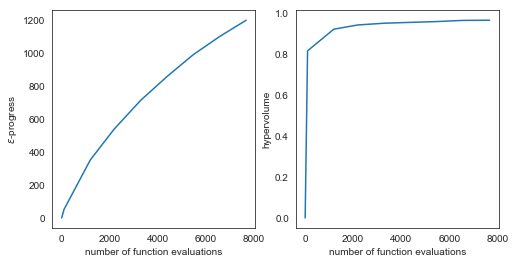

In [76]:
# check convergence metrics
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence['nfe'], convergence['epsilon_progress'])
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence['nfe'], convergence['hypervolume'])
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')

### Check the results

In [81]:
outcomes.sample(10)

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
162,0,0,0,0,0,0,0,0,1,0,...,7,0,0,1,0,1.983689e+09,2.257795e+08,30700000.0,95578.255507,0.151686
46,0,0,0,0,0,1,1,0,1,1,...,7,5,9,6,0,2.686157e+08,4.279734e+08,521600000.0,6084.864584,0.069453
154,1,0,0,0,0,0,1,1,1,1,...,2,5,10,5,0,5.917635e+07,7.059353e+08,796400000.0,2287.475903,0.005907
152,0,0,1,0,0,0,0,0,1,0,...,4,1,7,3,0,3.033498e+09,1.491411e+08,115300000.0,44693.468277,0.727014
256,0,1,0,0,0,0,0,0,0,0,...,1,4,0,1,0,2.656719e+09,1.083010e+08,205800000.0,96069.829149,0.186349
208,0,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,3.462842e+09,9.881494e+07,61400000.0,73960.461554,1.143085
35,0,0,0,0,0,0,0,0,1,1,...,3,5,6,5,3,4.963730e+08,4.779044e+08,273100000.0,18970.920219,0.047334
101,0,0,0,0,0,0,0,0,0,1,...,2,5,6,7,3,6.167039e+08,5.711070e+08,121200000.0,0.000000,0.407997
177,0,0,0,0,0,0,1,1,1,0,...,0,1,6,6,5,9.323749e+08,3.685595e+08,92100000.0,19483.891831,0.214936
70,0,0,1,0,0,0,1,1,1,0,...,1,4,1,0,0,1.204749e+09,3.483536e+08,297900000.0,0.000000,0.803388


#### - outcomes

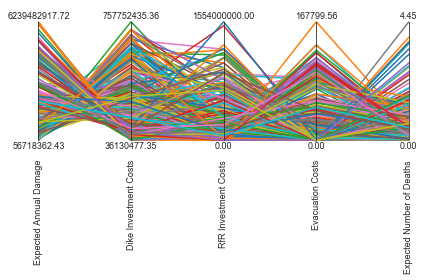

In [78]:
data = outcomes.loc[:, [o.name for o in dike_model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits, fontsize=9)
paraxes.plot(data)

#### - outcomes when doing no RfR

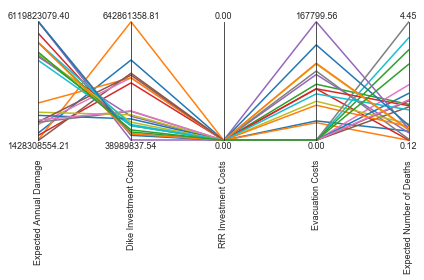

In [82]:
data = outcomes.loc[:, [o.name for o in dike_model.outcomes]]
dataNoRfR = data.loc[data['RfR Investment Costs'] == 0,:]
limits = parcoords.get_limits(dataNoRfR)

paraxes = parcoords.ParallelAxes(limits, fontsize=9)
paraxes.plot(dataNoRfR)

#### - outcomes when doing RfR

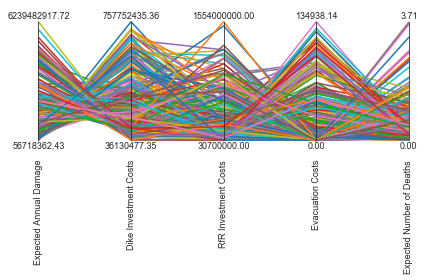

In [89]:
data = outcomes.loc[:, [o.name for o in dike_model.outcomes]]
dataWithRfR = data.loc[data['RfR Investment Costs'] != 0,:]
limits = parcoords.get_limits(dataWithRfR)

paraxes = parcoords.ParallelAxes(limits, fontsize=9)
paraxes.plot(dataWithRfR)

#### - outcomes when doing RfR and death happens

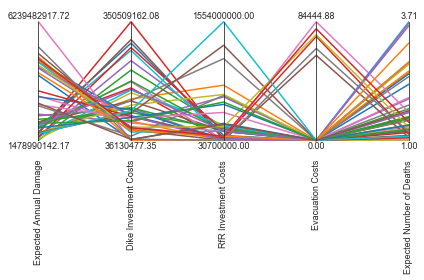

In [90]:
dataWithRfRDeath = dataWithRfR.loc[dataWithRfR['Expected Number of Deaths'] >= 1,:]
limits = parcoords.get_limits(dataWithRfRDeath)

paraxes = parcoords.ParallelAxes(limits, fontsize=9)
paraxes.plot(dataWithRfRDeath)